<a href="https://colab.research.google.com/github/mitesh98/Stochastic-Gradient-Descent/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_boston
boston=load_boston()

In [2]:
boston.data.shape

(506, 13)

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd
df=pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
df['Price']=boston.target
X=df.drop('Price',axis=1)
Y=df['Price']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [8]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

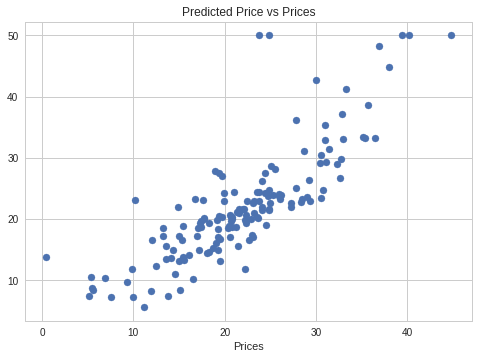

In [127]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,Y_test)
plt.xlabel("Predicted Price")
plt.xlabel("Prices")
plt.title("Predicted Price vs Prices")
plt.show()

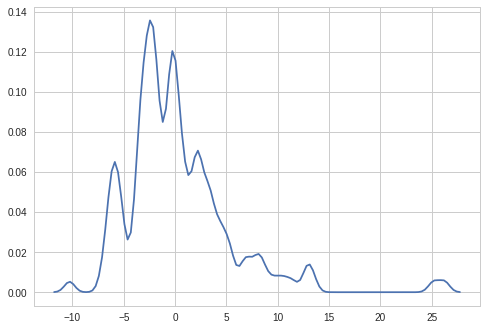

In [128]:
delta_y = Y_test - y_pred;

import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

# SGD Manual Implementation

1. initialize weight<w1 w2 w3.....w13>

 2.LOOP
 
  2.3.Randomly choose k points
  
  2.1 calulate delta_w
  
  2.2 calculate delta_b
  
  2.4  calculate w_j+1
  
  2.5 calculate b_j+1
  


In [0]:
def sgdmanual(k,max_itr,tol,r):
  w=np.random.rand(1,13) #initialize weight
  b=0                    #initialize bias
  kpoints=df.sample(n=k) #choose random k datpoint
  x=kpoints.drop('Price',axis=1).values   #X
  y=kpoints['Price'].values               #Y
  tolrence=1                               #tolrence 
  i=0
  while(i < max_itr and abs(tolrence)>tol):
    delta_l_w=0
    delta_l_b=0
    for j in range(len(x)):
      x_i=x[j]
      y_i=y[j]
      delta_l_w+=(-2*x_i)*(y_i - np.dot(x_i,w.T) -b )
      delta_l_b+=-2*(y_i -np.dot(x_i,w.T)-b )
    delta_l_w/=len(x)
    delta_l_b/=len(x)
    w=w-r*delta_l_w
    b=b-r*delta_l_b
    
    r=r/2
    i+=1
  print(w)
  print(b)
  return w ,b

In [0]:
def pred(X,w,b):
  Y=[]
  product=np.dot(X,w.T)
  for p in product:
    y_pred=np.asscalar(p)+np.asscalar(b)
    Y.append(y_pred)
  return Y

In [0]:
def MSE(y_pred,y):
  delta_y=y-y_pred
  delta_y_sq=np.square(delta_y)
  delta_y_sq/=len(y)
  return delta_y_sq.sum()

In [81]:
w,b=sgdmanual(k=100,max_itr=100,tol=0.0001,r=1)
y_pred=pred(X_test,w,b)


[[9.39892833e+54 3.12021496e+55 3.39114008e+55 2.12150327e+53
  1.52273780e+54 1.65202799e+55 1.86197257e+56 9.72928383e+54
  3.06963252e+55 1.22552311e+57 5.01672600e+55 9.25586817e+56
  3.44397863e+55]]
[2.66856812e+54]
(152, 13)
(1, 13)
(152, 1)


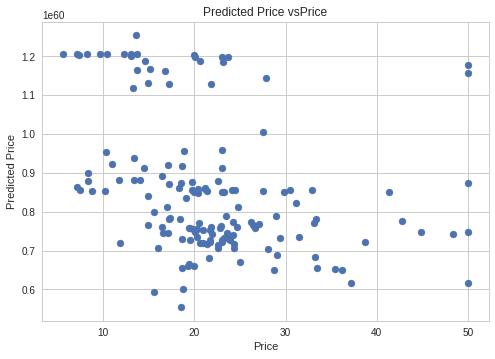

In [88]:
plt.scatter(Y_test,y_pred)
plt.ylabel("Predicted Price")
plt.xlabel("Price")
plt.title("Predicted Price vsPrice")
plt.show()

In [103]:
error=MSE(y_pred,Y_test)
print("MSE ", error)

MSE  7.626174501591983e+119


# SKLearn SGD

In [0]:
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor( max_iter=100,learning_rate='invscaling',tol=0.0001)
clf.fit(X_train,Y_train)
y_predicted=clf.predict(X_test)
weight=clf.coef_
bias=clf.intercept_

In [104]:
Mean_square_error=MSE(y_predicted,Y_test)
print("Sklearn SGD error ",Mean_square_error)

Sklearn SGD error  1.7025273388092043e+28


In [121]:
bias.shape

(1,)

In [122]:
b.shape

(1,)

# Conclusion

In [124]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Item","Manual","SGD"]
x.add_row(["w1",w[0][0],weight[0]])
x.add_row(["w2",w[0][1],weight[1]])
x.add_row(["w3",w[0][2],weight[2]])
x.add_row(["w4",w[0][3],weight[3]])
x.add_row(["w5",w[0][4],weight[4]])
x.add_row(["w6",w[0][5],weight[5]])
x.add_row(["w7",w[0][6],weight[6]])
x.add_row(["w8",w[0][7],weight[7]])
x.add_row(["w9",w[0][8],weight[8]])
x.add_row(["w10",w[0][9],weight[9]])
x.add_row(["w11",w[0][10],weight[10]])
x.add_row(["w12",w[0][11],weight[11]])
x.add_row(["w13",w[0][12],weight[12]])
x.add_row(["Bias",b[0],bias[0]])
x.add_row(["MSE",error,Mean_square_error])

  
print(x)

+------+------------------------+------------------------+
| Item |         Manual         |          SGD           |
+------+------------------------+------------------------+
|  w1  | 9.398928325381032e+54  |   217847150968.03842   |
|  w2  | 3.1202149609459267e+55 |   386409510859.8632    |
|  w3  | 3.391140081809122e+55  |   -293058187519.1618   |
|  w4  | 2.1215032655476505e+53 |   21859896292.384163   |
|  w5  | 1.5227378027448031e+54 |   -29698224875.28937   |
|  w6  | 1.6520279887733935e+55 |  -214608901631.17447   |
|  w7  | 1.861972574442322e+56  |   173587610050.39777   |
|  w8  |  9.72928382940926e+54  |   -5866980523.831262   |
|  w9  | 3.069632515160305e+55  |   503280189881.7392    |
| w10  | 1.2255231121379757e+57 |   344756472846.2696    |
| w11  | 5.016726001933227e+55  |   569125771964.1417    |
| w12  | 9.255868170939696e+56  |  -225945859759.00528   |
| w13  | 3.443978632139099e+55  |   692864677456.0981    |
| Bias | 2.668568118771134e+54  |   -8478742055.817002  